# MAHA AMANI AOUISSAT 

In [27]:
#importer les packages
import csv
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
#la collect les noms des fichiers
files=[file for file in os.listdir(r'/Users/yasmine/Desktop/data visualiotaion -projet /Sales_Data')]
for file in files:
    print(file)

Sales_December_2019.csv
.DS_Store
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


In [30]:
#cration d'une bade de données vide et mettre tous mais fichiers dedans
path= r'/Users/yasmine/Desktop/data visualiotaion -projet /Sales_Data'
all_data=pd.DataFrame()
for file in files:
    current_data=pd.read_csv(path+'/'+ file,encoding = 'unicode_escape')
    all_data= pd.concat([all_data,current_data])
print(all_data)



      Order ID                 Product Quantity Ordered Price Each  \
0       295665      Macbook Pro Laptop                1       1700   
1       295666      LG Washing Machine                1      600.0   
2       295667    USB-C Charging Cable                1      11.95   
3       295668        27in FHD Monitor                1     149.99   
4       295669    USB-C Charging Cable                1      11.95   
...        ...                     ...              ...        ...   
13617   222905  AAA Batteries (4-pack)                1       2.99   
13618   222906        27in FHD Monitor                1     149.99   
13619   222907    USB-C Charging Cable                1      11.95   
13620   222908    USB-C Charging Cable                1      11.95   
13621   222909  AAA Batteries (4-pack)                1       2.99   

           Order Date                        Purchase Address Unnamed: 0  
0      12/30/19 00:01  136 Church St, New York City, NY 10001        NaN  
1      12

In [31]:
all_data.to_csv(path+'/all_data.csv',index=False)

In [32]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Unnamed: 0          object
dtype: object

In [33]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN


In [34]:
all_data.isnull().sum()

Order ID               545
Product                545
Quantity Ordered       545
Price Each             545
Order Date             545
Purchase Address       545
Unnamed: 0          186850
dtype: int64

In [35]:
#supprimer les valeurs manquantes on a suffisamment de données
all_data=all_data.dropna(how='all')
all_data.shape

(186305, 7)

# le mois durant le quel nous avons réalisé le meilleur chiffre d’affaire

In [36]:
def month(x):
    return(x.split('/')[0]) #date americaine


In [37]:
all_data['Month']=all_data['Order Date'].apply(month)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN,12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN,12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN,12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN,12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN,12
...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",NaN,06
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",NaN,06
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",NaN,06
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",NaN,06


In [38]:
all_data['Month'].unique()

array(['12', 'Order Date', '01', '04', '05', '02', '03', '08', '09', '06',
       '11', '10', '07'], dtype=object)

In [39]:
all_data=all_data[all_data['Month']!='Order Date'] #supprimer la valeur 'order date'
all_data['Month'].unique()

array(['12', '01', '04', '05', '02', '03', '08', '09', '06', '11', '10',
       '07'], dtype=object)

In [40]:
all_data['Month']=all_data['Month'].astype(int)
all_data.dtypes

/var/folders/sm/6zl83rfj1gq8n_zrh3zdxv2c0000gp/T/ipykernel_77027/1533250404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Month']=all_data['Month'].astype(int)


Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Unnamed: 0          object
Month                int64
dtype: object

In [43]:
all_data['Price Each']=all_data['Price Each'].astype(float)
all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)

/var/folders/sm/6zl83rfj1gq8n_zrh3zdxv2c0000gp/T/ipykernel_77027/453039947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each']=all_data['Price Each'].astype(float)
/var/folders/sm/6zl83rfj1gq8n_zrh3zdxv2c0000gp/T/ipykernel_77027/453039947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered']=all_data['Quantity Ordered'].astype(int)


In [44]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Unnamed: 0           object
Month                 int64
dtype: object

In [45]:
all_data['Sales']=all_data['Price Each']*all_data['Quantity Ordered']

/var/folders/sm/6zl83rfj1gq8n_zrh3zdxv2c0000gp/T/ipykernel_77027/1306238483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Sales']=all_data['Price Each']*all_data['Quantity Ordered']


In [46]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN,12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN,12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN,12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN,12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN,12,11.95
...,...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",NaN,6,2.99
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",NaN,6,149.99
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",NaN,6,11.95
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",NaN,6,11.95


In [47]:
all_data.groupby('Month')['Sales'].sum()

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

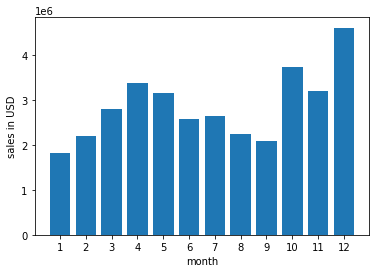

In [49]:
#visualisation
months=range(1,13)
plt.bar(month,all_data.groupby('Month')['Sales'].sum())
plt.xticks(months)
plt.ylabel("sales in USD")
plt.xlabel("month")
plt.show()

# la ville qui realise le meilleur chiffre d'affaire

In [50]:
all_data['Purchase Address']

0        136 Church St, New York City, NY 10001
1           562 2nd St, New York City, NY 10001
2          277 Main St, New York City, NY 10001
3           410 6th St, San Francisco, CA 94016
4                 43 Hill St, Atlanta, GA 30301
                          ...                  
13617             795 Pine St, Boston, MA 02215
13618     495 North St, New York City, NY 10001
13619     319 Ridge St, San Francisco, CA 94016
13620      916 Main St, San Francisco, CA 94016
13621            209 11th St, Atlanta, GA 30301
Name: Purchase Address, Length: 185950, dtype: object

In [55]:
def city(x):
    return x.split(',')[1]

In [57]:
all_data['City']=all_data['Purchase Address'].apply(city)
all_data

/var/folders/sm/6zl83rfj1gq8n_zrh3zdxv2c0000gp/T/ipykernel_77027/640088211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['City']=all_data['Purchase Address'].apply(city)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN,12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN,12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN,12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN,12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN,12,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",NaN,6,2.99,Boston
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",NaN,6,149.99,New York City
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",NaN,6,11.95,San Francisco
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",NaN,6,11.95,San Francisco


In [58]:
all_data.groupby('City')['City'].count() #compter le nombre de commandes pour chaque ville

City
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: City, dtype: int64

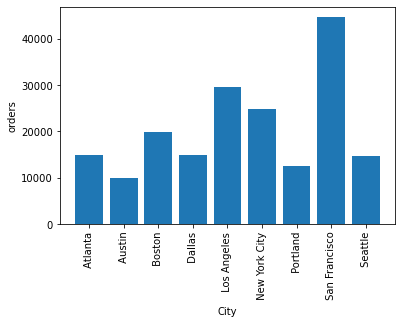

In [60]:
#visualisation
plt.bar(all_data.groupby('City')['City'].count().index,all_data.groupby('City')['City'].count())
plt.xticks(rotation='vertical')
plt.ylabel("orders")
plt.xlabel("City")
plt.show()

# le meilleur mois pour mener une compagne publicitaire

In [61]:
all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour

/var/folders/sm/6zl83rfj1gq8n_zrh3zdxv2c0000gp/T/ipykernel_77027/3083415790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour


In [62]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",NaN,12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",NaN,12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",NaN,12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",NaN,12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",NaN,12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",NaN,6,2.99,Boston,19
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",NaN,6,149.99,New York City,19
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",NaN,6,11.95,San Francisco,18
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",NaN,6,11.95,San Francisco,18


In [68]:
all_data['Hour']

0         0
1         7
2        18
3        15
4        12
         ..
13617    19
13618    19
13619    18
13620    18
13621    14
Name: Hour, Length: 185950, dtype: int64

In [66]:
#nombre de commande par heure
keys=[]
hours=[]
for key,hour in all_data.groupby('Hour'):
    keys.append(key)
    hours.append(len(hour))    
hours


[3910,
 2350,
 1243,
 831,
 854,
 1321,
 2482,
 4011,
 6256,
 8748,
 10944,
 12411,
 12587,
 12129,
 10984,
 10175,
 10384,
 10899,
 12280,
 12905,
 12228,
 10921,
 8822,
 6275]

Text(0, 0.5, 'order')

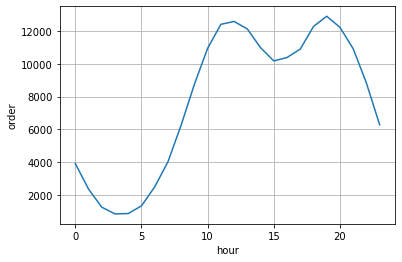

In [69]:
plt.grid()
plt.plot(keys,hours)
plt.xlabel('hour')
plt.ylabel('order')

# quel produit se vend le plus

<AxesSubplot:xlabel='Product'>

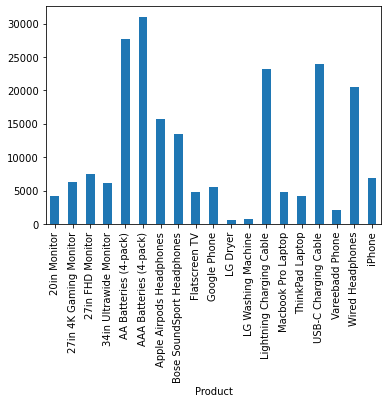

In [71]:
all_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

In [74]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [75]:
#on va esseyer de voir l'impact de prix 
products=all_data.groupby('Product')['Quantity Ordered'].sum().index
quantity=all_data.groupby('Product')['Quantity Ordered'].sum()
price=all_data.groupby('Product')['Price Each'].mean()


/var/folders/sm/6zl83rfj1gq8n_zrh3zdxv2c0000gp/T/ipykernel_77027/2222669758.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation="vertical",size=8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

<Figure size 2880x1728 with 0 Axes>

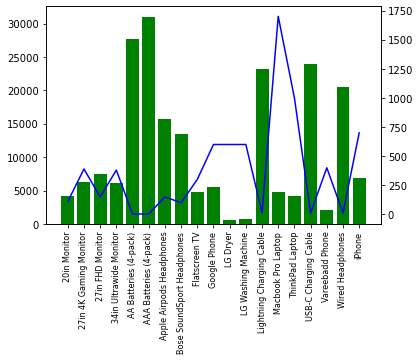

In [83]:
#visualisation : de l'imapct de prix
plt.figure(figsize=(40,24))
fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(products,quantity,color='g')
ax2.plot(products,price,'b-')
ax1.set_xticklabels(products,rotation="vertical",size=8)


# les combinaisons de produits qui se vendent le plus

In [86]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month,Sales,City,Hour
16,295681,Google Phone,1,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",NaN,12,600.00,Boston,12
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",NaN,12,11.95,Boston,12
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",NaN,12,99.99,Boston,12
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",NaN,12,11.99,Boston,12
36,295698,Vareebadd Phone,1,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",NaN,12,400.00,New York City,14
...,...,...,...,...,...,...,...,...,...,...,...
13592,222882,AA Batteries (4-pack),1,3.84,06/18/19 11:37,"990 Walnut St, Los Angeles, CA 90001",NaN,6,3.84,Los Angeles,11
13594,222884,Google Phone,1,600.00,06/04/19 12:06,"819 Pine St, New York City, NY 10001",NaN,6,600.00,New York City,12
13595,222884,USB-C Charging Cable,1,11.95,06/04/19 12:06,"819 Pine St, New York City, NY 10001",NaN,6,11.95,New York City,12
13614,222903,iPhone,1,700.00,06/07/19 22:21,"685 Hickory St, New York City, NY 10001",NaN,6,700.00,New York City,22


In [88]:
df['Combinaison']=df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))
df

/var/folders/sm/6zl83rfj1gq8n_zrh3zdxv2c0000gp/T/ipykernel_77027/2788576406.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Combinaison']=df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month,Sales,City,Hour,Combinaison
16,295681,Google Phone,1,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",NaN,12,600.00,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",NaN,12,11.95,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",NaN,12,99.99,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",NaN,12,11.99,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",NaN,12,400.00,New York City,14,"Vareebadd Phone,USB-C Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...,...
13592,222882,AA Batteries (4-pack),1,3.84,06/18/19 11:37,"990 Walnut St, Los Angeles, CA 90001",NaN,6,3.84,Los Angeles,11,"Apple Airpods Headphones,AA Batteries (4-pack)"
13594,222884,Google Phone,1,600.00,06/04/19 12:06,"819 Pine St, New York City, NY 10001",NaN,6,600.00,New York City,12,"Google Phone,USB-C Charging Cable"
13595,222884,USB-C Charging Cable,1,11.95,06/04/19 12:06,"819 Pine St, New York City, NY 10001",NaN,6,11.95,New York City,12,"Google Phone,USB-C Charging Cable"
13614,222903,iPhone,1,700.00,06/07/19 22:21,"685 Hickory St, New York City, NY 10001",NaN,6,700.00,New York City,22,"iPhone,Lightning Charging Cable"


In [92]:
df2=df.drop_duplicates(subset=['Order ID'])
df2

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Unnamed: 0,Month,Sales,City,Hour,Combinaison
16,295681,Google Phone,1,600.00,12/25/19 12:37,"79 Elm St, Boston, MA 02215",NaN,12,600.00,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,12/13/19 14:32,"175 1st St, New York City, NY 10001",NaN,12,400.00,New York City,14,"Vareebadd Phone,USB-C Charging Cable"
42,295703,AA Batteries (4-pack),1,3.84,12/17/19 12:27,"502 Jefferson St, Austin, TX 73301",NaN,12,3.84,Austin,12,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,iPhone,1,700.00,12/25/19 14:49,"203 Lakeview St, Boston, MA 02215",NaN,12,700.00,Boston,14,"iPhone,Lightning Charging Cable"
76,295735,iPhone,1,700.00,12/22/19 18:25,"374 Lincoln St, New York City, NY 10001",NaN,12,700.00,New York City,18,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...,...
13570,222863,27in FHD Monitor,1,149.99,06/07/19 11:05,"222 Walnut St, Austin, TX 73301",NaN,6,149.99,Austin,11,"27in FHD Monitor,Bose SoundSport Headphones"
13576,222868,iPhone,1,700.00,06/16/19 13:53,"505 North St, New York City, NY 10001",NaN,6,700.00,New York City,13,"iPhone,Apple Airpods Headphones"
13591,222882,Apple Airpods Headphones,1,150.00,06/18/19 11:37,"990 Walnut St, Los Angeles, CA 90001",NaN,6,150.00,Los Angeles,11,"Apple Airpods Headphones,AA Batteries (4-pack)"
13594,222884,Google Phone,1,600.00,06/04/19 12:06,"819 Pine St, New York City, NY 10001",NaN,6,600.00,New York City,12,"Google Phone,USB-C Charging Cable"


<AxesSubplot:ylabel='Combinaison'>

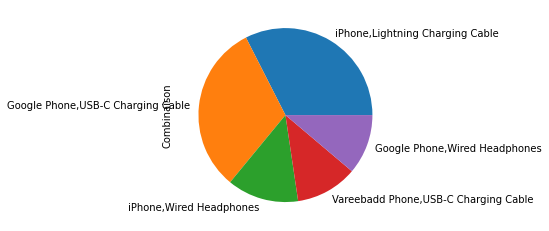

In [96]:
df2['Combinaison'].value_counts()[0:5].plot.pie() #les 5 combinaison les plus achetées